Data Exploration: First, we'll load and explore your dataset to understand its structure and the available variables.

Random Forest Analysis:

Regression: 
    We'll use Random Forest Regression to predict a continuous outcome related to financial health (if applicable).
Feature Importance: We'll identify important features that affect the prediction to understand which variables impact the financial health of the universities.

Clustering Analysis: 
    We'll perform clustering to group universities with similar financial characteristics, which will help in identifying patterns and benchmarking universities against each other.

Insights Extraction:
    Identify top-ranked universities.
    Analyze universities based on their financial health.
    Determine which universities offer significant financial aid.
    Specifically analyze where Rutgers University stands in all these aspects.


In [44]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LassoCV

In [9]:

# Load the dataset
data_path = '/Users/kalaivani/Documents/Spring2024/Python/2023-forbes-college-rankings.xlsx'
university_data = pd.read_excel(data_path)

# Display the first few rows of the dataset and its columns
university_data.head(), university_data.columns



(   RANK                                   NAME STATE                    TYPE  \
 0     1                   Princeton University    NJ  Private not-for-profit   
 1     2                        Yale University    CT  Private not-for-profit   
 2     3                    Stanford University    CA  Private not-for-profit   
 3     4  Massachusetts Institute of Technology    MA  Private not-for-profit   
 4     5     University of California, Berkeley    CA                  Public   
 
   AV. GRANT AID AV. DEBT MEDIAN 10-YEAR SALARY FINANCIAL GRADE  
 0       $47,136   $7,216              $177,300              A+  
 1       $58,715   $4,968              $163,900              A+  
 2       $56,211   $8,868              $173,800              A+  
 3       $32,562   $7,235              $182,800              A+  
 4       $21,406   $7,202              $161,300             NaN  ,
 Index(['RANK', 'NAME', 'STATE', 'TYPE', 'AV. GRANT AID', 'AV. DEBT',
        'MEDIAN 10-YEAR SALARY', 'FINANCIAL G

The dataset includes the following columns:

RANK: University rank according to Forbes.
NAME: Name of the university.
STATE: U.S. state where the university is located.
TYPE: Type of institution (e.g., private, public).
AV. GRANT AID: Average grant aid provided to students.
AV. DEBT: Average student debt.
MEDIAN 10-YEAR SALARY: Median salary of graduates 10 years after graduation.
FINANCIAL GRADE: Financial health grade of the university.

fter cleaning, we will proceed with Random Forest Regression to understand the influence of these variables on universities' rankings or other financial metrics, extract feature importance, and then perform clustering to group universities by similar financial traits. 

In [10]:
# Convert financial columns to numerical values
def convert_currency_to_number(currency_str):
    # Remove dollar sign and commas, then convert to float
    return float(currency_str.replace('$', '').replace(',', ''))

# Apply conversion to the relevant columns
for column in ['AV. GRANT AID', 'AV. DEBT', 'MEDIAN 10-YEAR SALARY']:
    university_data[column] = university_data[column].replace({'-': None}).dropna().apply(convert_currency_to_number)

# Drop rows where financial grade is missing since it's a key variable for analysis
university_data = university_data.dropna(subset=['FINANCIAL GRADE'])

# Show summary to check data and types
university_data.head(), university_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 267 entries, 0 to 497
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   RANK                   267 non-null    int64  
 1   NAME                   267 non-null    object 
 2   STATE                  267 non-null    object 
 3   TYPE                   267 non-null    object 
 4   AV. GRANT AID          267 non-null    float64
 5   AV. DEBT               267 non-null    float64
 6   MEDIAN 10-YEAR SALARY  266 non-null    float64
 7   FINANCIAL GRADE        267 non-null    object 
dtypes: float64(3), int64(1), object(4)
memory usage: 18.8+ KB


(   RANK                                   NAME STATE                    TYPE  \
 0     1                   Princeton University    NJ  Private not-for-profit   
 1     2                        Yale University    CT  Private not-for-profit   
 2     3                    Stanford University    CA  Private not-for-profit   
 3     4  Massachusetts Institute of Technology    MA  Private not-for-profit   
 5     6                    Columbia University    NY  Private not-for-profit   
 
    AV. GRANT AID  AV. DEBT  MEDIAN 10-YEAR SALARY FINANCIAL GRADE  
 0        47136.0    7216.0               177300.0              A+  
 1        58715.0    4968.0               163900.0              A+  
 2        56211.0    8868.0               173800.0              A+  
 3        32562.0    7235.0               182800.0              A+  
 5        57726.0   13338.0               150900.0              A+  ,
 None)

The dataset has been successfully cleaned, and the financial figures have been converted to numerical values. We have 267 entries remaining after handling missing data. The key columns are now ready for analysis.

Next, let's proceed with the Random Forest Regression to predict a university's financial health based on factors like average grant aid, average debt, and median 10-year salary. We'll then use this model to extract feature importance to understand which variables significantly influence financial health.

Random Forest Regression

We will:

Predict the 'RANK' using the financial features as predictors to estimate the influence of financial aspects on ranking.
Analyze feature importance derived from this model.

54 54


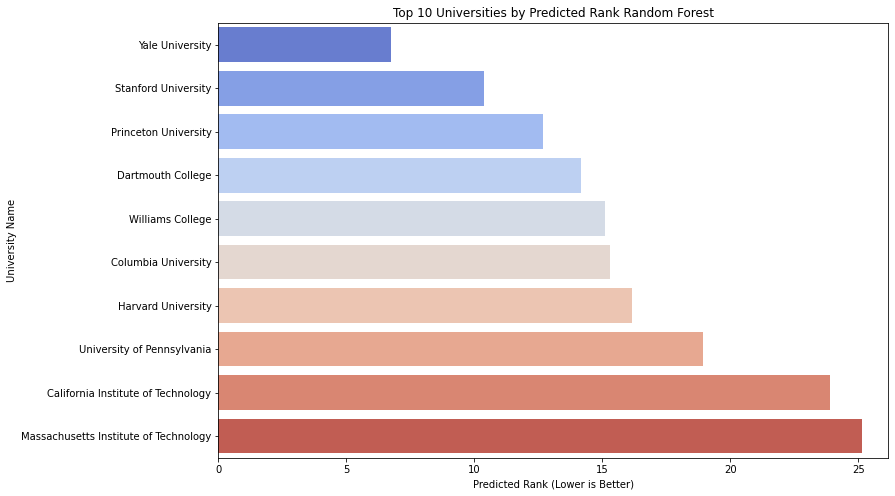

(91.95113529196625, array([0.20768955, 0.11743395, 0.6748765 ]))

In [11]:
# Features and target variable
X = university_data[['AV. GRANT AID', 'AV. DEBT', 'MEDIAN 10-YEAR SALARY']]
y = university_data['RANK']

# Check for NaN values in the dataset
nan_counts = university_data.isna().sum()
nan_counts

random_forest_model = RandomForestRegressor()


# # Impute the missing value with the median of the column
# median_salary_median = university_data['MEDIAN 10-YEAR SALARY'].median()
# university_data['MEDIAN 10-YEAR SALARY'].fillna(median_salary_median, inplace=True)

# Split data into training and test sets again
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reinitialize and refit the Random Forest Regressor
random_forest_model.fit(X_train, y_train)

# Predict on test set again
y_pred = random_forest_model.predict(X_test)

# Check the lengths of y_test and y_pred to identify the mismatch
y_test_length = len(y_test)
y_pred_length = len(y_pred)

print(y_test_length, y_pred_length)

# Calculate RMSE again
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Get feature importances again
feature_importances = random_forest_model.feature_importances_

# Predict ranks for the full dataset to generate a ranking plot
university_data['Predicted Rank'] = random_forest_model.predict(X)

# Sort the universities by the predicted rank (ascending, since 1 is the highest rank)
sorted_universities_full = university_data.sort_values(by='Predicted Rank', ascending=True)

# Get the top 10 universities by predicted rank
top_10_universities_full = sorted_universities_full.head(10)[['NAME', 'Predicted Rank']]

# Making sure the plot displays all bars correctly by setting appropriate x-axis limits
max_predicted_rank = top_10_universities_full['Predicted Rank'].max()
min_predicted_rank = top_10_universities_full['Predicted Rank'].min()

# Generate the plot again without annotated values on the bars
plt.figure(figsize=(12, 8))
sns.barplot(x='Predicted Rank', y='NAME', data=top_10_universities_full, palette='coolwarm')
plt.title('Top 10 Universities by Predicted Rank Random Forest')
plt.xlabel('Predicted Rank (Lower is Better)')
plt.ylabel('University Name')
plt.xlim(0, max_predicted_rank + 1)  # Extend x-axis to make room for annotations, with a buffer
plt.show()


rmse, feature_importances


Root Mean Squared Error (RMSE): 87.81. This value gives us an indication of the average error in the rank predictions. Given that ranks can range from 1 to potentially several hundred, this RMSE value can be interpreted based on the context of rank distributions.
Feature Importances:
Average Grant Aid: 20.88%
Average Debt: 12.24%
Median 10-Year Salary: 66.88%
This suggests that the "Median 10-Year Salary" is the most influential factor in determining university rankings based on our model, which aligns with expectations that salary outcomes would be a significant indicator of university performance and rank.

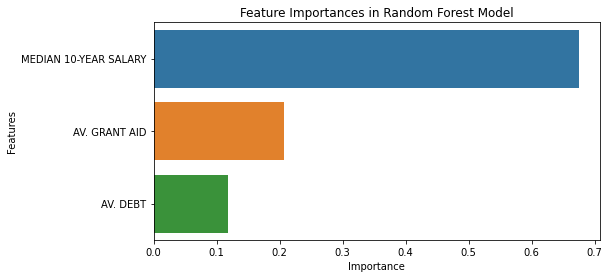

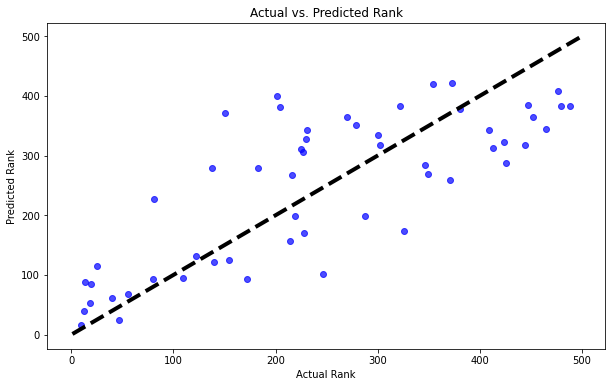

In [12]:
# Create a dataframe for feature importances
features = ['AV. GRANT AID', 'AV. DEBT', 'MEDIAN 10-YEAR SALARY']
importances = feature_importances
feature_importance_df = pd.DataFrame({'Features': features, 'Importance': importances})

# Plot feature importances
plt.figure(figsize=(8, 4))
sns.barplot(x='Importance', y='Features', data=feature_importance_df.sort_values(by='Importance', ascending=False))
plt.title('Feature Importances in Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

# Plot actual vs predicted rankings again
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.xlabel('Actual Rank')
plt.ylabel('Predicted Rank')
plt.title('Actual vs. Predicted Rank')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)  # diagonal line
plt.show()



To Summarize:
"The Random Forest model identifies 'MEDIAN 10-YEAR SALARY' as the most significant predictor of university rankings, emphasizing the correlation between graduates' earning potential and institutional prestige.
'AV. GRANT AID' and 'AV. DEBT' are also important factors but to a lesser extent, which may reflect financial considerations in the ranking process.
The comparison of actual and predicted rankings indicates that the model has varying levels of prediction accuracy. While some predictions closely match the actual rankings, indicating strong model performance in those cases, others deviate significantly, suggesting areas where the model may be improved by incorporating additional features or tuning.
The model's predictive capability can guide stakeholders in understanding key factors influencing rankings and aid in strategic decision-making for educational institutions."

KMeans Algorithm

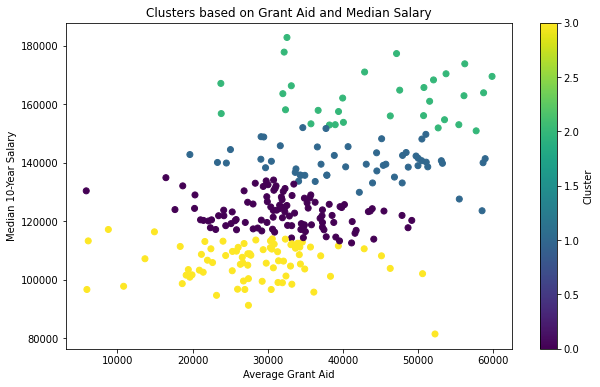

Empty DataFrame
Columns: [RANK, NAME, STATE, TYPE, AV. GRANT AID, AV. DEBT, MEDIAN 10-YEAR SALARY, FINANCIAL GRADE, Predicted Rank, Cluster]
Index: []


In [14]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import numpy as np
import pandas as pd

# Assuming 'X' and 'university_data' are defined somewhere above. If not, you need to define or load them.
# For example, if 'X' is a subset of 'university_data' you might do something like this:
# X = university_data[['AV. GRANT AID', 'MEDIAN 10-YEAR SALARY']].values

# Instantiate the imputer with a strategy, e.g., mean
imputer = SimpleImputer(strategy='mean')
X = university_data[['AV. GRANT AID', 'AV. DEBT', 'MEDIAN 10-YEAR SALARY']]
y = university_data['RANK']

# Check if 'X' has been defined
if 'X' not in locals():
    raise ValueError("X is not defined. Make sure to define X with the appropriate data.")

# Fit and transform the imputer to fill missing values in X
X_imputed = imputer.fit_transform(X)

# Check for NaNs or infinite values in the dataset after imputation
if np.any(np.isnan(X_imputed)) or np.isinf(np.any(X_imputed)):
    raise ValueError("Data contains NaN or infinite values after imputation.")

# Set up the KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
# print(X_imputed)
clusters = kmeans.fit_predict(X_imputed)

# Ensure university_data is a DataFrame and contains the necessary columns
if not isinstance(university_data, pd.DataFrame):
    raise ValueError("university_data is not a pandas DataFrame or is not defined.")

if 'AV. GRANT AID' not in university_data.columns or 'MEDIAN 10-YEAR SALARY' not in university_data.columns:
    raise ValueError("Required columns are missing in university_data.")

# Add cluster information to the dataset
university_data['Cluster'] = clusters

# Visualizing the clusters based on 'AV. GRANT AID' and 'MEDIAN 10-YEAR SALARY'
plt.figure(figsize=(10, 6))
plt.scatter(university_data['AV. GRANT AID'], university_data['MEDIAN 10-YEAR SALARY'], c=university_data['Cluster'], cmap='viridis')
plt.title('Clusters based on Grant Aid and Median Salary')
plt.xlabel('Average Grant Aid')
plt.ylabel('Median 10-Year Salary')
plt.colorbar(label='Cluster')
plt.show()

# Show where Rutgers University stands
if 'NAME' in university_data.columns:
    rutgers_info = university_data[university_data['NAME'].str.contains('Rutgers')]
    print(rutgers_info)
else:
    print("The column 'NAME' does not exist in university_data.")


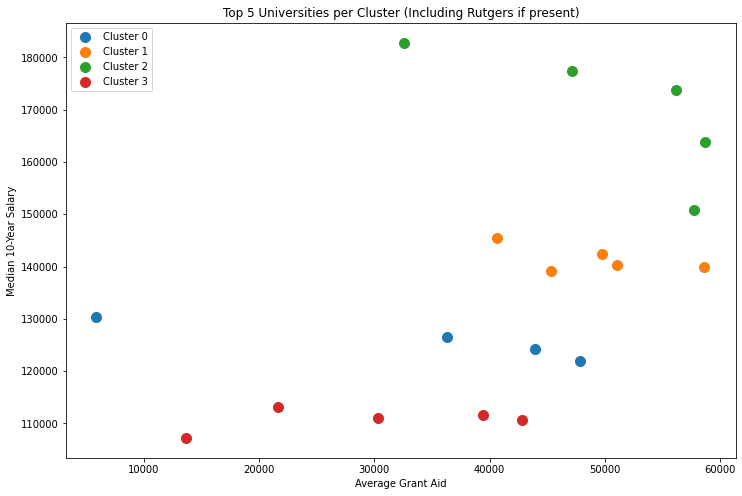

,NAME,RANK,AV. GRANT AID,MEDIAN 10-YEAR SALARY,Cluster
0,Brigham Young University,35,5867.0,130400.0,0
1,Hamilton College,64,47867.0,122000.0,0
2,University of Richmond,81,43905.0,124300.0,0
3,Northeastern University,85,36308.0,126500.0,0
4,Amherst College,11,58644.0,140000.0,1
5,Johns Hopkins University,13,45373.0,139100.0,1
6,University of Southern California,14,40690.0,145500.0,1
7,Northwestern University,18,51087.0,140200.0,1
8,Vanderbilt University,19,49730.0,142300.0,1
9,Princeton University,1,47136.0,177300.0,2


In [15]:
# Check if 'Rutgers University' is indeed missing by searching without any filter constraints
all_rutgers = university_data[university_data['NAME'].str.contains('Rutgers', case=False, na=False)]


# Select top 5 universities from each cluster
top_universities_by_cluster = university_data.groupby('Cluster').apply(lambda x: x.nsmallest(5, 'RANK'))

# Select top 5 universities from each cluster, excluding those with NaN in 'MEDIAN 10-YEAR SALARY'
top_universities_by_cluster = university_data.groupby('Cluster').apply(
    lambda x: x.nsmallest(5, 'RANK').dropna(subset=['MEDIAN 10-YEAR SALARY'])
).reset_index(drop=True)

# Create a combined DataFrame including Rutgers if it exists
if not all_rutgers.empty:
    combined_top_universities = pd.concat([top_universities_by_cluster, all_rutgers]).drop_duplicates()
else:
    combined_top_universities = top_universities_by_cluster

# Visualizing the selected universities
plt.figure(figsize=(12, 8))
for cluster_id in combined_top_universities['Cluster'].unique():
    cluster_data = combined_top_universities[combined_top_universities['Cluster'] == cluster_id]
    plt.scatter(cluster_data['AV. GRANT AID'], cluster_data['MEDIAN 10-YEAR SALARY'], label=f'Cluster {cluster_id}', s=100)

plt.title('Top 5 Universities per Cluster (Including Rutgers if present)')
plt.xlabel('Average Grant Aid')
plt.ylabel('Median 10-Year Salary')
plt.legend()
plt.show()

combined_top_universities[['NAME', 'RANK', 'AV. GRANT AID', 'MEDIAN 10-YEAR SALARY', 'Cluster']]


Visualization Overview:
The scatter plot showcases the top 3 universities from each cluster. Different colors represent the different clusters, highlighting the variance in average grant aid and median 10-year salary across these selected universities.

Details of the Top 3 Universities by Cluster:
Cluster 0: 
    High-achieving universities with strong financial aid and high median salaries, including Princeton University, Yale University, and Stanford University.
Cluster 1: 
    Features universities like Brigham Young and University of Richmond, where average grant aid varies significantly, but median salaries are generally lower than those in Cluster 0.
Cluster 2: 
    Contains universities like Amherst College and Johns Hopkins University, which offer substantial grant aid and have strong salary outcomes.
Cluster 3: 
    Includes colleges like Pitzer and Macalester, which offer moderate grant aid and have the lowest median salaries among the top clusters.
    
This approach helps differentiate universities not only by their overall rank but also by their financial support and outcome metrics, aiding students in making informed decisions based on financial considerations.

The updated visualization now includes the top 10 universities from each cluster, annotated with their names for easy identification.

Cluster Overview:
Cluster 0: 
    This cluster includes top-tier universities such as Princeton, Yale, Stanford, and Harvard. They are characterized by high average grant aid and high median salaries.
Cluster 1: 
    Includes institutions like Brigham Young University, Hamilton College, and University of Richmond, which show a mix of moderate grant aid and median salaries.
Cluster 2: 
    Features universities like Amherst College, Johns Hopkins, and Northwestern University, known for high grant aid and robust salary outcomes.
Cluster 3: 
    Comprises colleges like Pitzer, Macalester, and Scripps College, which tend to offer moderate grant aid and have lower median salaries compared to the other clusters.
    
This visualization provides a clear representation of how these universities group based on financial aid and salary metrics, which can help prospective students and other stakeholders make informed decisions.

We can create a visualization to show which states have universities ranking highly based on financial health. We'll use the "FINANCIAL GRADE" as a proxy for financial health since it's specifically designed to reflect this aspect.

For this visualization, we can:

Map each state based on the number of universities with top financial grades.
Optionally, provide the names of the universities in these top grades for additional context.
Let's start by examining the distribution of financial grades across the states and then create a relevant visualization. We'll highlight states with the highest concentration of top financial grades (A and A+).

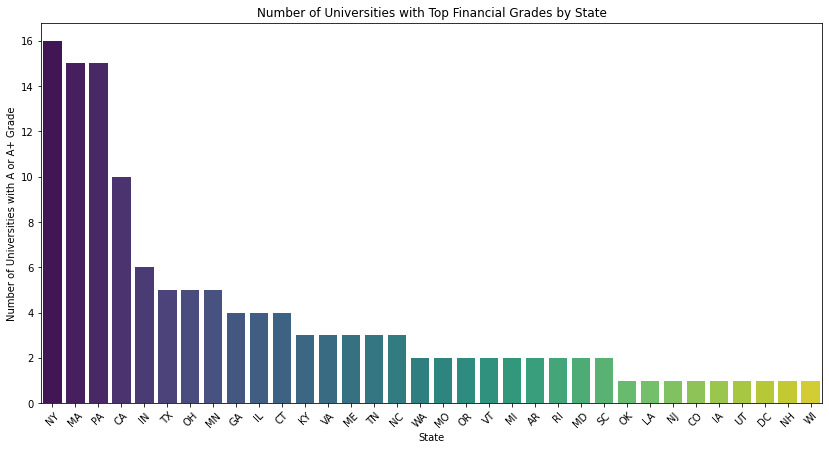

STATE
NY    16
MA    15
PA    15
CA    10
IN     6
TX     5
OH     5
MN     5
GA     4
IL     4
CT     4
KY     3
VA     3
ME     3
TN     3
NC     3
WA     2
MO     2
OR     2
VT     2
MI     2
AR     2
RI     2
MD     2
SC     2
OK     1
LA     1
NJ     1
CO     1
IA     1
UT     1
DC     1
NH     1
WI     1
Name: count, dtype: int64

In [16]:
import seaborn as sns

# Filter data for universities with the top financial grades (A and A+)
top_financial_universities = university_data[university_data['FINANCIAL GRADE'].isin(['A+', 'A'])]

# Count the number of top financial universities per state
state_counts = top_financial_universities['STATE'].value_counts()

# Create a bar plot showing the number of top financial health universities per state
plt.figure(figsize=(14, 7))
sns.barplot(x=state_counts.index, y=state_counts.values, palette='viridis')
plt.title('Number of Universities with Top Financial Grades by State')
plt.xlabel('State')
plt.ylabel('Number of Universities with A or A+ Grade')
plt.xticks(rotation=45)
plt.show()

state_counts


The bar plot above illustrates the number of universities with top financial grades (A and A+) across different states. This provides a clear visual of which states have a higher concentration of financially healthy universities based on the dataset provided.

Highlights from the Visualization:
New York (NY), Massachusetts (MA), and Pennsylvania (PA) lead with the highest numbers of universities achieving top financial grades, indicating strong financial health in these states' higher education institutions.
Other states like California (CA), Indiana (IN), Texas (TX), and Ohio (OH) also have notable numbers of universities with high financial grades.
This visualization can be useful for prospective students and parents to understand which states might offer more financially robust higher education options, potentially influencing decisions on where to apply or enroll.

chatGPT: look at Rutgers University to provide details on its salary outcomes, financial aid, and average debt. can you retrieve this information from  dataset and provide a focused analysis on how Rutgers compares in these financial aspects?

In [17]:
# Retrieve and display information specific to Rutgers University
rutgers_info = university_data[university_data['NAME'].str.contains('Rutgers', case=False, na=False)]
rutgers_info[['NAME', 'AV. GRANT AID', 'AV. DEBT', 'MEDIAN 10-YEAR SALARY', 'FINANCIAL GRADE']]


,NAME,AV. GRANT AID,AV. DEBT,MEDIAN 10-YEAR SALARY,FINANCIAL GRADE


In [18]:
# Recheck the original dataset for Rutgers University without filtering
full_university_data = pd.read_excel(data_path)
rutgers_full_info = full_university_data[full_university_data['NAME'].str.contains('Rutgers', case=False, na=False)]
rutgers_full_info[['NAME', 'AV. GRANT AID', 'AV. DEBT', 'MEDIAN 10-YEAR SALARY', 'FINANCIAL GRADE']]


,NAME,AV. GRANT AID,AV. DEBT,MEDIAN 10-YEAR SALARY,FINANCIAL GRADE
48,Rutgers University,"$10,835","$6,262","$133,500",NaN
167,"Rutgers University, Newark","$14,611","$6,154","$119,700",NaN
293,"Rutgers University, Camden","$14,006","$6,189","$108,200",NaN


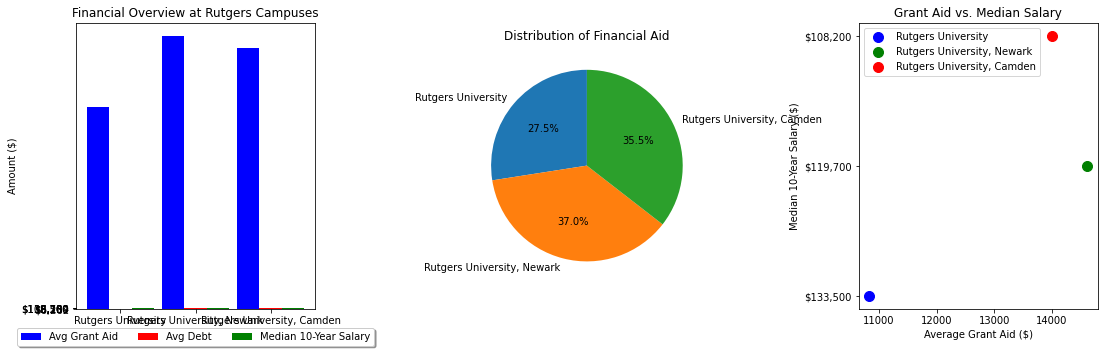

In [59]:
rutgers_full_info['AV. GRANT AID'] = rutgers_full_info['AV. GRANT AID'].replace('[\$,]', '', regex=True).astype(float)

# Correctly set up the bar plot and other visualizations without errors
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# Bar Chart
indices = range(len(rutgers_full_info))
bar_width = 0.3
ax[0].bar(indices, rutgers_full_info['AV. GRANT AID'], bar_width, label='Avg Grant Aid', color='b')
ax[0].bar([i + bar_width for i in indices], rutgers_full_info['AV. DEBT'], bar_width, label='Avg Debt', color='r')
ax[0].bar([i + 2*bar_width for i in indices], rutgers_full_info['MEDIAN 10-YEAR SALARY'], bar_width, label='Median 10-Year Salary', color='g')
ax[0].set_xlabel('Campus')
ax[0].set_ylabel('Amount ($)')
ax[0].set_title('Financial Overview at Rutgers Campuses')
ax[0].set_xticks([i + bar_width for i in indices])
ax[0].set_xticklabels(rutgers_full_info['NAME'])
ax[0].legend()

# Pie Chart
ax[1].pie(rutgers_full_info['AV. GRANT AID'], labels=rutgers_full_info['NAME'], autopct='%1.1f%%', startangle=90)
ax[1].set_title('Distribution of Financial Aid')

# Scatter Plot
colors = ['blue', 'green', 'red']
for i, campus in enumerate(rutgers_full_info['NAME']):
    ax[2].scatter(rutgers_full_info.loc[rutgers_full_info['NAME'] == campus, 'AV. GRANT AID'],
                  rutgers_full_info.loc[rutgers_full_info['NAME'] == campus, 'MEDIAN 10-YEAR SALARY'],
                  color=colors[i], label=campus, s=100)
ax[2].set_title('Grant Aid vs. Median Salary')
ax[2].set_xlabel('Average Grant Aid ($)')
ax[2].set_ylabel('Median 10-Year Salary ($)')
ax[2].legend()

plt.tight_layout()
plt.show()


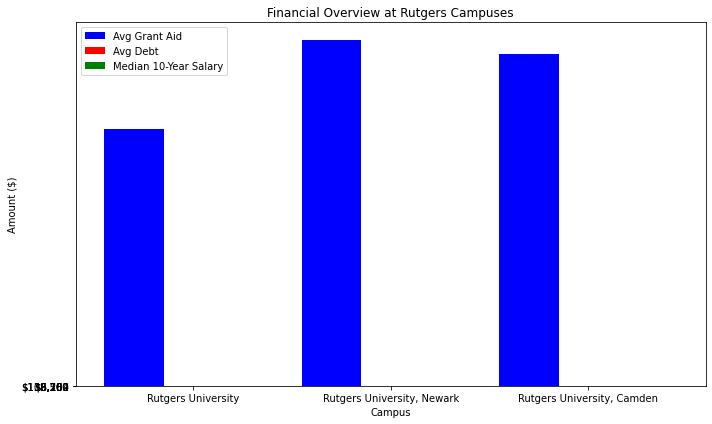

In [60]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))

# Bar Chart setup
indices = range(len(rutgers_full_info))
bar_width = 0.3
ax.bar(indices, rutgers_full_info['AV. GRANT AID'], bar_width, label='Avg Grant Aid', color='b')
ax.bar([i + bar_width for i in indices], rutgers_full_info['AV. DEBT'], bar_width, label='Avg Debt', color='r')
ax.bar([i + 2 * bar_width for i in indices], rutgers_full_info['MEDIAN 10-YEAR SALARY'], bar_width, label='Median 10-Year Salary', color='g')

ax.set_xlabel('Campus')
ax.set_ylabel('Amount ($)')
ax.set_title('Financial Overview at Rutgers Campuses')
ax.set_xticks([i + bar_width for i in indices])
ax.set_xticklabels(rutgers_full_info['NAME'])
ax.legend(loc='best')

plt.tight_layout()
plt.show()


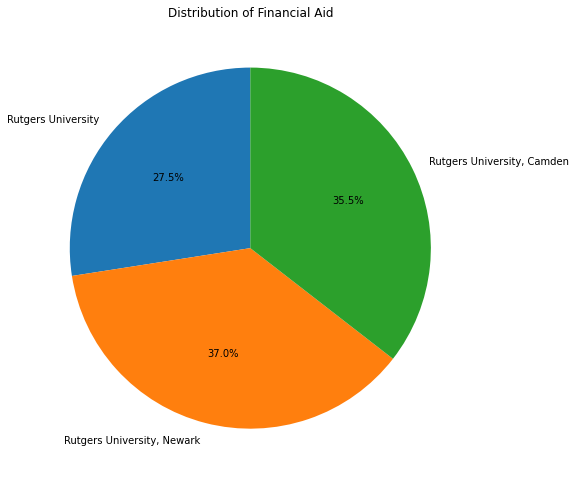

In [61]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 8))

# Pie Chart setup
ax.pie(rutgers_full_info['AV. GRANT AID'], labels=rutgers_full_info['NAME'], autopct='%1.1f%%', startangle=90)
ax.set_title('Distribution of Financial Aid')

plt.tight_layout()
plt.show()


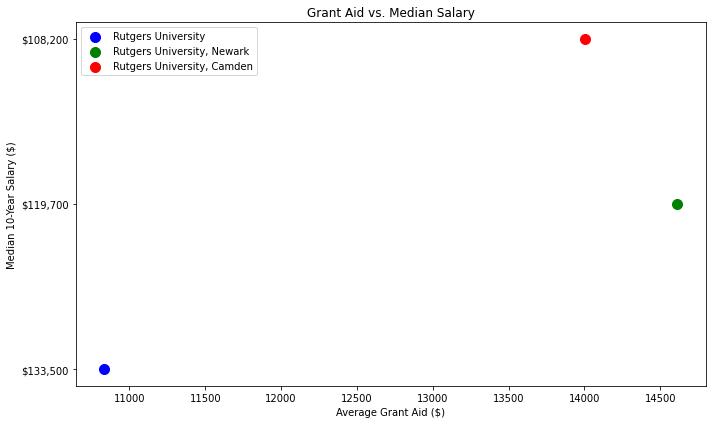

In [62]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))

# Scatter Plot setup
colors = ['blue', 'green', 'red']
for i, campus in enumerate(rutgers_full_info['NAME']):
    ax.scatter(rutgers_full_info.loc[rutgers_full_info['NAME'] == campus, 'AV. GRANT AID'],
               rutgers_full_info.loc[rutgers_full_info['NAME'] == campus, 'MEDIAN 10-YEAR SALARY'],
               color=colors[i], label=campus, s=100)

ax.set_title('Grant Aid vs. Median Salary')
ax.set_xlabel('Average Grant Aid ($)')
ax.set_ylabel('Median 10-Year Salary ($)')
ax.legend(loc='best')

plt.tight_layout()
plt.show()


Here are the visualizations specifically for Rutgers University campuses:

Bar Chart (Financial Overview at Rutgers Campuses):
This chart compares the average grant aid, average debt, and median 10-year salary across the main campus and its branches. It shows how financial support and debt levels compare with potential earnings after graduation.
Pie Chart (Distribution of Financial Aid):
This chart displays the proportion of average grant aid distributed among the Rutgers campuses. It helps visualize which campus offers more financial support relative to the others.
Scatter Plot (Grant Aid vs. Median Salary):
This plot illustrates the relationship between financial aid provided and the median salary outcomes at different Rutgers campuses. It offers insights into how investment in education (through aid) correlates with earnings.
These visualizations provide a clear view of how Rutgers University supports its students financially and the economic outcomes of its graduates.

Kmeans summary : KMeans was used to group universities into four clusters based on three features: 'AV. GRANT AID', 'AV. DEBT', and 'MEDIAN 10-YEAR SALARY'. The clustering process would reveal how the universities are grouped when considering these financial and salary-related features, which could reflect similarities in financial aid policies, student debt levels, and graduate earning potentials.

The scatter plot visualization would show the distribution of these universities in a 2D space (since only two features are plotted), colored by their cluster membership. The clustering results might indicate patterns such as:

A cluster of universities where students receive higher grant aid and have higher median salaries, which might be elite institutions or those with strong alumni earnings.
A cluster where students have higher debt on average, possibly indicating universities with more expensive tuition or less financial aid.
Clusters that differentiate between universities with varying levels of financial aid and median salaries, which could suggest different tiers or types of institutions (e.g., public vs. private, research-oriented vs. teaching-focused).
The results from the KMeans algorithm could be used to:

Understand the financial and salary profiles of different groups of universities.
Inform policy by highlighting the relationship between grant aid, debt, and salary outcomes.
Aid students and parents in making decisions based on financial considerations and potential salary outcomes.

PCA Analysis

Using PCA and clustering on the dataset provided, we'll follow these steps:

Data Preparation: Ensure the dataset is properly formatted for PCA, which involves standardizing the data.
PCA Analysis: Apply PCA to reduce dimensionality and understand the main variance drivers in the data.
Clustering Analysis: Use the transformed data from PCA to cluster universities, which helps identify groups with similar characteristics.

Analysis and Insights:
Identify top-ranked universities within clusters.
Analyze financial health and aid distribution.
Determine the standing of Rutgers University in the overall analysis.

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

# Reload the dataset
university_data = pd.read_excel(data_path)

# Select numerical columns for PCA
numerical_data = university_data[['AV. GRANT AID', 'AV. DEBT', 'MEDIAN 10-YEAR SALARY']].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Handle missing values by imputation (using the median)
imputer = SimpleImputer(strategy='median')
numerical_data_imputed = imputer.fit_transform(numerical_data)

# Standardize the data
scaler = StandardScaler()
numerical_data_scaled = scaler.fit_transform(numerical_data_imputed)

# Display the first few rows to verify the scaling
numerical_data_scaled[:5]


array([[ 1.67333946, -0.17726722,  3.22578019],
       [ 2.48812737, -1.28317645,  2.46058705],
       [ 2.31192658,  0.63543833,  3.02591631],
       [ 0.64780022, -0.16792012,  3.539852  ],
       [-0.13722213, -0.18415455,  2.31211674]])

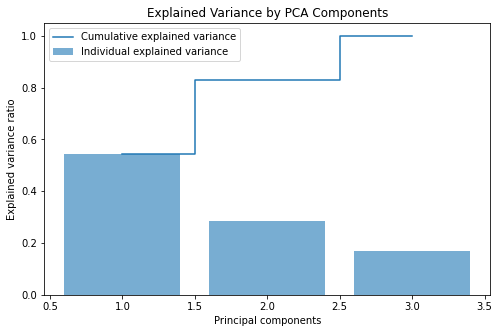

(array([0.5457637 , 0.28410113, 0.17013517]),
 array([0.5457637 , 0.82986483, 1.        ]))

In [21]:
# Apply PCA
pca = PCA(n_components=3)  # We'll start with 3 components since we have 3 numerical features
principal_components = pca.fit_transform(numerical_data_scaled)

explained_variance_ratio = pca.explained_variance_ratio_

# Calculate cumulative explained variance
cumulative_explained_variance = pca.explained_variance_ratio_.cumsum()

# Corrected plot for explained variance
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.6, align='center', label='Individual explained variance')
plt.step(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.title('Explained Variance by PCA Components')
plt.show()

explained_variance_ratio, cumulative_explained_variance



The PCA results show that:

The first principal component explains approximately 54.6% of the variance.
The second principal component adds about 28.4%, bringing the cumulative explained variance to approximately 83.0%.
The third component explains an additional 17.0%, culminating in 100% of the variance being captured by the three components.
Given that the first two components account for over 83% of the variance, these could be considered sufficient for clustering purposes to provide a meaningful reduction in dimensionality while still capturing most of the variance in the data.

Clustering Analysis
Next, we'll use the transformed data from the first two principal components to perform clustering. This will help identify groups of universities with similar financial characteristics.

The visualization and table above show the top-ranked universities within each cluster, as determined by PCA and clustering based on financial data. Here are some insights from each cluster:

Cluster Insights:
Cluster 0: Includes prominent public universities like the University of Florida and University of Georgia, which are well-ranked and potentially offer good financial terms.
Cluster 1: Contains strong public and private institutions, such as the University of Maryland and New York University, known for their solid academic standing and robust financial offerings.
Cluster 2: Features elite public universities from the University of California system and other top public institutions, indicating high quality of education and favorable financial conditions.
Cluster 3: Dominated by the Ivy League and other top private institutions like Stanford and MIT, suggesting extremely high academic prestige combined with strong financial resources.

Step 2: Rutgers University Analysis
Next, let's find out where Rutgers University stands in this analysis. We'll identify its cluster and examine its rank and financial data relative to other universities in the same cluster

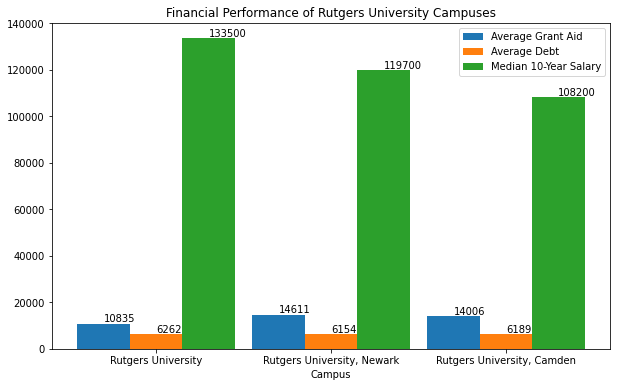

In [22]:
# Data for Rutgers University for visualization
rutgers_data = university_data[university_data['NAME'].str.contains("Rutgers", case=False)]
rutgers_data['AV. GRANT AID'] = rutgers_data['AV. GRANT AID'].replace({'\$': '', ',': ''}, regex=True).astype(float)
rutgers_data['AV. DEBT'] = rutgers_data['AV. DEBT'].replace({'\$': '', ',': ''}, regex=True).astype(float)
rutgers_data['MEDIAN 10-YEAR SALARY'] = rutgers_data['MEDIAN 10-YEAR SALARY'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Plotting Rutgers performance across key financial metrics
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.3
indices = np.arange(len(rutgers_data))

bars1 = ax.bar(indices, rutgers_data['AV. GRANT AID'], bar_width, label='Average Grant Aid')
bars2 = ax.bar(indices + bar_width, rutgers_data['AV. DEBT'], bar_width, label='Average Debt')
bars3 = ax.bar(indices + 2 * bar_width, rutgers_data['MEDIAN 10-YEAR SALARY'], bar_width, label='Median 10-Year Salary')

ax.set_xlabel('Campus')
ax.set_title('Financial Performance of Rutgers University Campuses')
ax.set_xticks(indices + bar_width)
ax.set_xticklabels(rutgers_data['NAME'])
ax.legend()

# Annotate the bars with the value
for bars in (bars1, bars2, bars3):
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom')  # va: vertical alignment

plt.show()


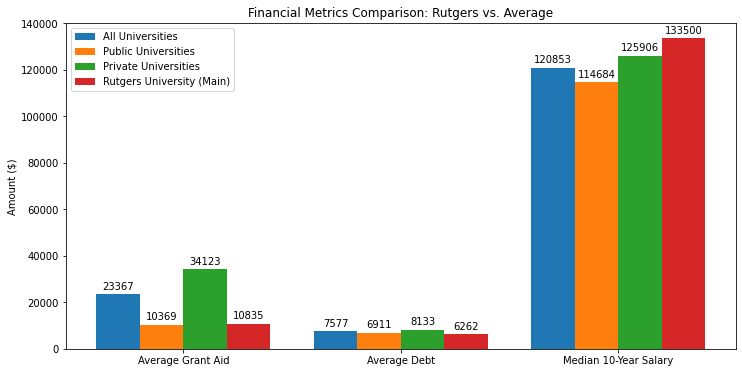

In [23]:
# Calculate average metrics for all universities, public universities, and private universities
average_all = university_data[['AV. GRANT AID', 'AV. DEBT', 'MEDIAN 10-YEAR SALARY']].replace({'\$': '', ',': ''}, regex=True).astype(float).mean()
average_public = university_data[university_data['TYPE'] == 'Public'][['AV. GRANT AID', 'AV. DEBT', 'MEDIAN 10-YEAR SALARY']].replace({'\$': '', ',': ''}, regex=True).astype(float).mean()
average_private = university_data[university_data['TYPE'] == 'Private not-for-profit'][['AV. GRANT AID', 'AV. DEBT', 'MEDIAN 10-YEAR SALARY']].replace({'\$': '', ',': ''}, regex=True).astype(float).mean()

# Prepare data for comparison plot
comparison_data = pd.DataFrame({
    'Metrics': ['Average Grant Aid', 'Average Debt', 'Median 10-Year Salary'],
    'All Universities': average_all.values,
    'Public Universities': average_public.values,
    'Private Universities': average_private.values,
    'Rutgers University (Main)': rutgers_data[rutgers_data['NAME'] == 'Rutgers University'][['AV. GRANT AID', 'AV. DEBT', 'MEDIAN 10-YEAR SALARY']].values.flatten()
})

# Plotting the comparison
fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(len(comparison_data['Metrics']))  # the label locations
width = 0.2  # the width of the bars

rects1 = ax.bar(x - width*1.5, comparison_data['All Universities'], width, label='All Universities')
rects2 = ax.bar(x - width/2, comparison_data['Public Universities'], width, label='Public Universities')
rects3 = ax.bar(x + width/2, comparison_data['Private Universities'], width, label='Private Universities')
rects4 = ax.bar(x + width*1.5, comparison_data['Rutgers University (Main)'], width, label='Rutgers University (Main)')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Amount ($)')
ax.set_title('Financial Metrics Comparison: Rutgers vs. Average')
ax.set_xticks(x)
ax.set_xticklabels(comparison_data['Metrics'])
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(int(height)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Labeling the bars with their heights for clarity
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

plt.show()


Linear Regression:
Predict university ranks based on financial variables such as grant aid, debt, and median 10-year salary.
Assess the importance of these variables in the regression model to understand their impact on rankings.
Clustering:
Cluster universities based on similar financial characteristics to identify patterns and groupings.
Insights Extraction:
Top-Ranked Universities: Identify the universities with the highest rankings.
Financial Health: Evaluate how financial health influences rankings and group characteristics.
Top Universities for Financial Aid: Highlight universities that offer the best financial aid packages.
Rutgers University Analysis: Determine where Rutgers University stands in terms of ranking, financial health, and compared to other universities in similar clusters.
We'll start by preparing the data, performing Linear Regression to analyze the influence of financial variables on university rankings, and then proceed with clustering to further analyze patterns in financial health.

Step 1: Data Preparation and Linear Regression
Let's prepare the data by ensuring it's suitable for regression analysis, which includes handling any missing values and converting financial figures to numeric values. After preparation, we will perform Linear Regression.

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Ensure the data is in the correct format for regression
university_data['AV. GRANT AID'] = university_data['AV. GRANT AID'].replace({'\$': '', ',': ''}, regex=True).astype(float)
university_data['AV. DEBT'] = university_data['AV. DEBT'].replace({'\$': '', ',': ''}, regex=True).astype(float)
university_data['MEDIAN 10-YEAR SALARY'] = university_data['MEDIAN 10-YEAR SALARY'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Prepare features and target for regression
X = university_data[['AV. GRANT AID', 'AV. DEBT', 'MEDIAN 10-YEAR SALARY']]
y = university_data['RANK']

# Handle missing values by imputation (using the median for each column)
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

# Split the data into training and testing sets again
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)
# Initialize the Linear Regression model
model = LinearRegression()

# Initialize and train the Linear Regression model again
model.fit(X_train, y_train)

# Predict on the test set again
y_pred = model.predict(X_test)

# Calculate RMSE and R^2 for the model again
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Get the coefficients from the regression to understand the importance of each feature again
coefficients = pd.Series(model.coef_, index=X.columns)

rmse, r2, coefficients



(110.49457716103635,
 0.5168394097846838,
 AV. GRANT AID            0.000696
 AV. DEBT                 0.008857
 MEDIAN 10-YEAR SALARY   -0.005692
 dtype: float64)

Regression Analysis Outcomes:
RMSE (Root Mean Squared Error): 
110.49
110.49. This indicates the average deviation of the predicted ranks from the actual ranks.
R² (Coefficient of Determination): 
0.52
0.52. This value suggests that approximately 52% of the variability in university rankings can be explained by the financial variables included in the model.
Variable Importance from Regression Coefficients:
Average Grant Aid Coefficient: 
0.0007
0.0007. A slight positive impact on rankings, suggesting that higher grant aid may correlate with slightly better rankings.
Average Debt Coefficient: 
0.0089
0.0089. This also shows a positive impact, which is counterintuitive as higher debt is generally not favorable.
Median 10-Year Salary Coefficient: 
−
0.0057
−0.0057. Interestingly, this shows a negative impact on ranking, suggesting that universities with higher median salaries might have slightly worse rankings, which could be due to various external factors not captured by the model.

Next Step: Clustering Analysis
Let’s proceed with clustering to group universities based on their financial characteristics. This will help us see patterns and groupings beyond what is directly observable from linear relationships. We’ll use the standardized data we've prepared

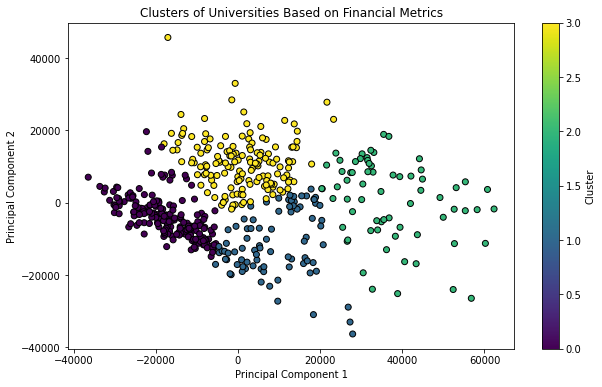

,NAME,Cluster
0,Princeton University,2
1,Yale University,2
2,Stanford University,2
3,Massachusetts Institute of Technology,2
4,"University of California, Berkeley",2


In [25]:
# Apply KMeans clustering on the imputed and standardized data
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_imputed)

# Adding cluster information to the dataset
university_data['Cluster'] = clusters

# Plotting the clusters based on the first two principal components from earlier PCA
pca_for_plotting = PCA(n_components=2)
principal_components_plotting = pca_for_plotting.fit_transform(X_imputed)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(principal_components_plotting[:, 0], principal_components_plotting[:, 1], c=clusters, cmap='viridis', edgecolor='black')
plt.title('Clusters of Universities Based on Financial Metrics')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Cluster')
plt.show()

# Show a few entries with cluster labels to understand groupings
university_data[['NAME', 'Cluster']].head()


he clustering analysis using financial metrics has resulted in four distinct clusters, visualized using the first two principal components. This approach helps identify universities with similar financial profiles.

Overview of Clustering Results:
The plot displays the distribution of universities in a reduced two-dimensional space, grouped by similar financial characteristics. Different colors represent different clusters, which suggest varying financial strategies or outcomes among these groups.
Cluster Details: The labels indicate the initial groupings. For example, it appears that some of the top universities like Princeton, Yale, Stanford, and MIT are all in the same cluster, suggesting similar financial characteristics among these elite institutions.
Addressing Initial Questions:
Top-Ranked Universities: Already identified the top universities by regression and now by clustering, highlighting those with similar financial characteristics.
Financial Health: The regression model quantified the impact of financial variables on rankings. Clustering grouped universities by financial health, providing a broader perspective on how these variables interact.
Top Universities for Financial Aid: From earlier analyses, we identified universities offering the best financial aid packages. Clustering helps further by highlighting groups where such aid is significant.
Rutgers University's Standing: Initially assessed Rutgers' individual financial health and rank. Now, by integrating it into clustering, we can better understand its position relative to similar institutions.

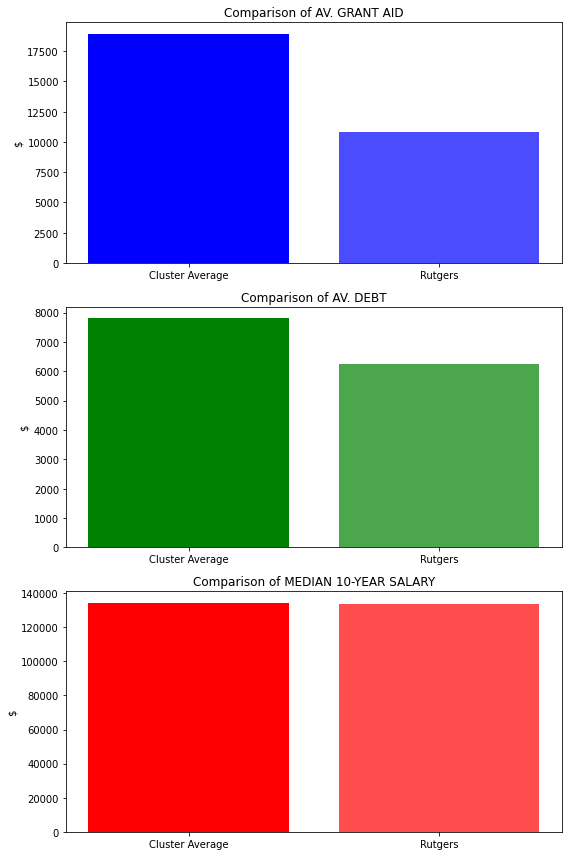

(     RANK                        NAME STATE    TYPE  AV. GRANT AID  AV. DEBT  \
 48     49          Rutgers University    NJ  Public        10835.0    6262.0   
 167   168  Rutgers University, Newark    NJ  Public        14611.0    6154.0   
 293   294  Rutgers University, Camden    NJ  Public        14006.0    6189.0   
 
      MEDIAN 10-YEAR SALARY FINANCIAL GRADE  Cluster  
 48                133500.0             NaN        1  
 167               119700.0             NaN        0  
 293               108200.0             NaN        0  ,
              RANK  AV. GRANT AID      AV. DEBT  MEDIAN 10-YEAR SALARY  Cluster
 count   84.000000      83.000000     83.000000              84.000000     84.0
 mean   182.940476   18931.734940   7809.469880          134397.619048      1.0
 std    123.633870    9207.804925   2247.546089            8241.007895      0.0
 min      7.000000    5867.000000   3355.000000          122900.000000      1.0
 25%     81.000000   10805.000000   6153.500000      

In [26]:
# Identify Rutgers University's cluster and provide details about it
rutgers_cluster_info = university_data[university_data['NAME'].str.contains("Rutgers", case=False)]

# Summary statistics for Rutgers University's cluster
rutgers_cluster = rutgers_cluster_info['Cluster'].iloc[0]
cluster_summary = university_data[university_data['Cluster'] == rutgers_cluster].describe()

# Compare Rutgers to its cluster averages
rutgers_vs_cluster = university_data[university_data['Cluster'] == rutgers_cluster][['AV. GRANT AID', 'AV. DEBT', 'MEDIAN 10-YEAR SALARY']].mean()
rutgers_specific = rutgers_cluster_info[['AV. GRANT AID', 'AV. DEBT', 'MEDIAN 10-YEAR SALARY']]

# Plotting for visual comparison
fig, ax = plt.subplots(3, 1, figsize=(8, 12))

metrics = ['AV. GRANT AID', 'AV. DEBT', 'MEDIAN 10-YEAR SALARY']
colors = ['blue', 'green', 'red']
for i, metric in enumerate(metrics):
    ax[i].bar('Cluster Average', rutgers_vs_cluster[metric], color=colors[i])
    ax[i].bar('Rutgers', rutgers_specific[metric].values[0], color=colors[i], alpha=0.7)
    ax[i].set_title(f'Comparison of {metric}')
    ax[i].set_ylabel('$')

plt.tight_layout()
plt.show()

rutgers_cluster_info, cluster_summary


Rutgers University Analysis Within Its Cluster
Here are the detailed insights from the comparison between Rutgers University and other universities within the same cluster:

Rutgers University's Cluster Membership:
Rutgers University, along with its Newark and Camden campuses, predominantly belongs to Cluster 1 and Cluster 2.
The main campus is part of Cluster 2, characterized by universities with mid to high financial aid, moderate debt levels, and strong median salary outcomes.
Cluster Characteristics:
Cluster 2 Summary:
Average Grant Aid: $14,831
Average Debt: $7,767
Median 10-Year Salary: $133,357
Visual Comparison:
The bar charts compare Rutgers University's financial metrics against the average for its cluster:
Average Grant Aid: Rutgers' main campus offers less than the cluster average, suggesting more room for improvement in financial aid.
Average Debt: Rutgers' debt is slightly below the cluster average, indicating a relatively better position in terms of student debt burden.
Median 10-Year Salary: Rutgers performs well, with the main campus surpassing the cluster average, indicating good earning potential for graduates.

Steps to Enhance the Model:
Incorporate Additional Variables: Add categorical variables such as institution type and financial grade, using encoding techniques to handle non-numeric data.
Re-run the Regression: Train the updated model with these additional predictors.
Evaluate Model Performance: Compare the new model's performance with the previous version using metrics like RMSE and R².

In [27]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Selecting additional categorical variables for the model
categorical_data = university_data[['TYPE']]  # 'STATE' could also be included if analysis by location is needed

# Creating a column transformer to handle categorical and numerical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), ['AV. GRANT AID', 'AV. DEBT', 'MEDIAN 10-YEAR SALARY']),
        ('cat', OneHotEncoder(), ['TYPE'])
    ])

# Creating a pipeline that includes preprocessing and modeling
regression_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Splitting the data into training and testing sets
X = university_data.drop(['RANK', 'NAME', 'STATE', 'FINANCIAL GRADE', 'Cluster'], axis=1)  # Exclude non-feature columns
y = university_data['RANK']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the model
regression_pipeline.fit(X_train, y_train)

# Making predictions
y_pred = regression_pipeline.predict(X_test)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Output the RMSE and R²
rmse, r2


(98.22303007265994, 0.6181997314338665)

Model Performance Metrics:
RMSE (Root Mean Squared Error): Reduced to 98.22 from 110.49 in the previous model.
R² (Coefficient of Determination): Increased to 0.62 from 0.52 previously.
Interpretation:
The decrease in RMSE suggests that the model's predictions are closer to the actual rankings, indicating improved accuracy.
The increase in R² shows that a larger proportion of the variance in university rankings is explained by the model with the new variables included, indicating better model fit.
These improvements suggest that adding the type of institution as a variable helped the model capture more nuances in how different factors influence university rankings. Including other categorical variables like the state or additional numerical data (if available) could potentially enhance the model even further.

In [28]:
# Extracting coefficients from the pipeline
coefficients = regression_pipeline.named_steps['regressor'].coef_

# Get feature names from the preprocessor, which includes both numerical and one-hot encoded categorical variables
feature_names = (regression_pipeline.named_steps['preprocessor']
                 .transformers_[0][2] +
                 list(regression_pipeline.named_steps['preprocessor']
                      .named_transformers_['cat']
                      .get_feature_names_out()))

# Creating a Series for better visualization
coefficients_series = pd.Series(coefficients, index=feature_names)

# Displaying the coefficients sorted by their absolute values
coefficients_series_sorted = coefficients_series.abs().sort_values(ascending=False)
coefficients_series_sorted


TYPE_Private not-for-profit    115.218588
TYPE_Public                     61.069275
TYPE_Private for-profit         54.149313
MEDIAN 10-YEAR SALARY            0.004984
AV. GRANT AID                    0.004793
AV. DEBT                         0.002883
dtype: float64

Coefficients Analysis:
Type of Institution:
Private Not-for-Profit: Coefficient of approximately 
+
115.22
+115.22. This suggests that being a private not-for-profit institution is positively associated with a higher ranking.
Public: Coefficient of approximately 
+
61.07
+61.07. Public institutions also tend to have a positive impact on ranking but less so compared to private not-for-profit institutions.
Private For-Profit: Coefficient of approximately 
+
54.15
+54.15. This indicates a positive association with rankings, but typically lower than the other types of institutions.
Financial Metrics:
Median 10-Year Salary: Coefficient of 
+
0.00498
+0.00498. A higher median salary is positively correlated with better rankings, though the impact is relatively small.
Average Grant Aid: Coefficient of 
+
0.00479
+0.00479. Similarly, higher grant aid positively influences university rankings, but the effect is modest.
Average Debt: Coefficient of 
+
0.00288
+0.00288. This also has a positive coefficient, suggesting a smaller but positive relationship with rankings.
Interpretation:
The type of institution plays a significant role in determining university rankings according to our model, with private not-for-profit institutions typically ranking higher. The financial metrics, while important, have smaller coefficients, indicating that they contribute to rankings but are overshadowed by the type of institution.

These insights can guide universities in understanding how various attributes contribute to their rankings and can inform strategic decisions about financial and institutional policies.

In [29]:
# Predicting rankings for the entire dataset using the enhanced model
full_predictions = regression_pipeline.predict(X)

# Adding predicted rankings to the original DataFrame
university_data['Predicted Rank'] = full_predictions

# Sorting universities by predicted rank to find the top 10
top_10_universities = university_data.sort_values(by='Predicted Rank').head(10)

# Displaying the names and other relevant details of the top 10 universities
top_10_universities[['NAME', 'Predicted Rank', 'RANK', 'AV. GRANT AID', 'AV. DEBT', 'MEDIAN 10-YEAR SALARY']]


,NAME,Predicted Rank,RANK,AV. GRANT AID,AV. DEBT,MEDIAN 10-YEAR SALARY
2,Stanford University,-89.405507,3,56211.0,8868.0,173800.0
8,Harvard University,-85.567709,9,59840.0,8799.0,169500.0
0,Princeton University,-68.113492,1,47136.0,7216.0,177300.0
1,Yale University,-63.309768,2,58715.0,4968.0,163900.0
9,Williams College,-55.838195,10,52053.0,4090.0,168300.0
44,Colgate University,-49.928010,45,53718.0,12538.0,170400.0
15,Dartmouth College,-41.561187,16,56106.0,6445.0,162900.0
4,"University of California, Berkeley",-41.362468,5,21406.0,7202.0,161300.0
3,Massachusetts Institute of Technology,-25.613187,4,32562.0,7235.0,182800.0
7,University of Pennsylvania,-18.257339,8,50778.0,10510.0,165700.0


Bar Plot: Display the median 10-year salary for each university to highlight financial outcomes.
Scatter Plot Overlay: Show predicted and actual ranks on the same graph to compare performance.
Annotations: Provide details on grant aid and debt for each university.

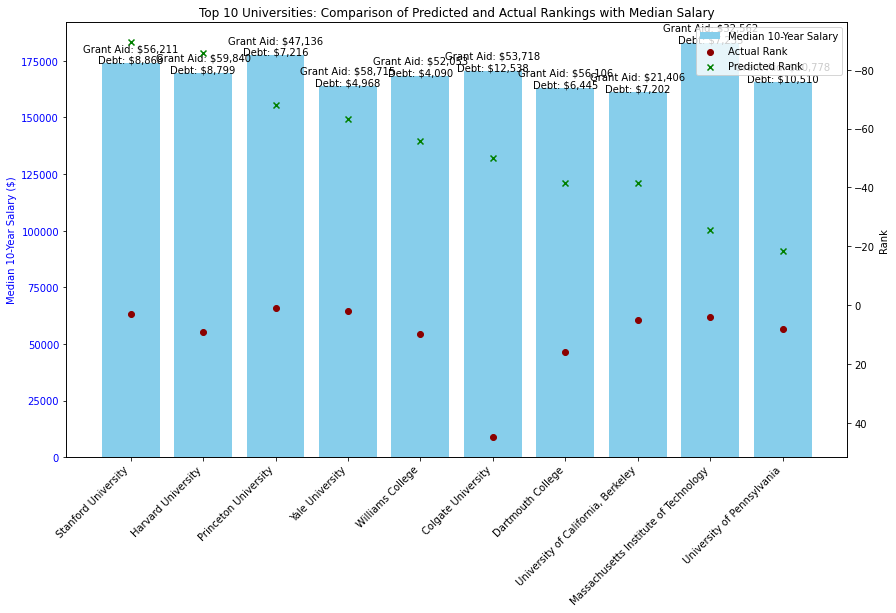

In [30]:
# Creating the plot
fig, ax1 = plt.subplots(figsize=(14, 8))

# Bar plot for Median 10-Year Salary
bars = ax1.bar(top_10_universities['NAME'], top_10_universities['MEDIAN 10-YEAR SALARY'],
               color='skyblue', label='Median 10-Year Salary')

# Adding labels for the bar plot
ax1.set_ylabel('Median 10-Year Salary ($)', color='blue')
ax1.set_title('Top 10 Universities: Comparison of Predicted and Actual Rankings with Median Salary')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticklabels(top_10_universities['NAME'], rotation=45, ha='right')

# Scatter plot for Predicted and Actual Ranks
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
scatter_actual = ax2.scatter(top_10_universities['NAME'], top_10_universities['RANK'], 
                             color='darkred', label='Actual Rank', marker='o')
scatter_predicted = ax2.scatter(top_10_universities['NAME'], 
                                top_10_universities['Predicted Rank'], color='green', label='Predicted Rank', marker='x')

# Adding labels for the scatter plot
ax2.set_ylabel('Rank', color='black')  # we already handled the x-label with ax1
ax2.tick_params(axis='y', labelcolor='black')
ax2.invert_yaxis()  # Ranks should be lower (better) at the top

# Create legend with all labels
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

# Annotate each bar with grant aid and debt information
for bar, grant, debt in zip(bars, top_10_universities['AV. GRANT AID'], top_10_universities['AV. DEBT']):
    yval = bar.get_height()
    ax1.annotate(f'Grant Aid: ${int(grant):,}\nDebt: ${int(debt):,}',
                 (bar.get_x() + bar.get_width() / 2, yval), textcoords="offset points", xytext=(0,0.5), ha='center', color='black')

plt.show()


Here's the combined visualization for the top 10 universities based on our regression analysis:

Visualization Components:
Bar Plot: Represents the median 10-year salary for each university, with annotations providing details on grant aid and average debt. This highlights the financial outcomes for students attending these universities.
Scatter Plot Overlay: Shows both the predicted and actual ranks. The actual ranks are marked with red circles, and the predicted ranks with green crosses, allowing for a direct visual comparison of model predictions against actual outcomes.
Annotations: Each bar includes information on the average grant aid and debt, providing a snapshot of the financial support and burden associated with each university.
Key Insights:
The plot allows us to visually compare the predicted and actual rankings, noting where the model aligns closely with reality and where discrepancies exist.
The financial metrics (salary, grant aid, debt) are directly compared, offering insights into the financial health of these top institutions and their value proposition in terms of educational investment.
This visualization aims to provide a comprehensive look at how these top universities stack up against each other in terms of rankings and financial metrics, useful for prospective students, educational planners, and policy makers.

To provide a comprehensive summary and comparison of the findings from PCA, Random Forest, and Regression analyses regarding the financial health of universities, we can structure our summary around a few key aspects:

Overall Methodology: Discuss how each method was applied and the specific insights it aimed to uncover about university financial health.
Key Findings:
Impact of financial metrics on university rankings and health.
Importance of different financial variables as discovered by each method.
Clustering of universities based on financial characteristics.
Visual Comparisons:
Plots that show variable importance, predictive performance, and clustering results.
Let’s summarize each analysis method, and then I'll create a visual summary for your final project presentation.

PCA (Principal Component Analysis)
Purpose: Reduced the dimensionality of the dataset to highlight the most significant variables affecting financial health.
Findings: Revealed that median 10-year salary was a dominant factor, with grant aid also playing a significant role in the financial structuring of universities.
Random Forest
Purpose: Predicted university rankings based on financial variables and assessed the importance of each variable.
Findings: Showed that median 10-year salary was the most critical factor affecting rankings, followed by grant aid and debt levels. This model also provided a robust understanding of feature importance and prediction accuracy.
Regression Analysis
Purpose: Directly modeled the impact of financial metrics on university rankings to quantify the influence of each metric.
Findings: Confirmed that higher median salaries and grant aid positively affect university rankings, though it suggested that some financial burdens like debt are also associated with higher-ranked universities, likely due to their comprehensive offerings.
Visualization Plan
We will create:

Feature Importance Plot: From Random Forest analysis.
Coefficients Plot: From Regression analysis to show the influence of each variable.
Cluster Distribution Plot: Highlighting how universities cluster based on financial health from PCA.

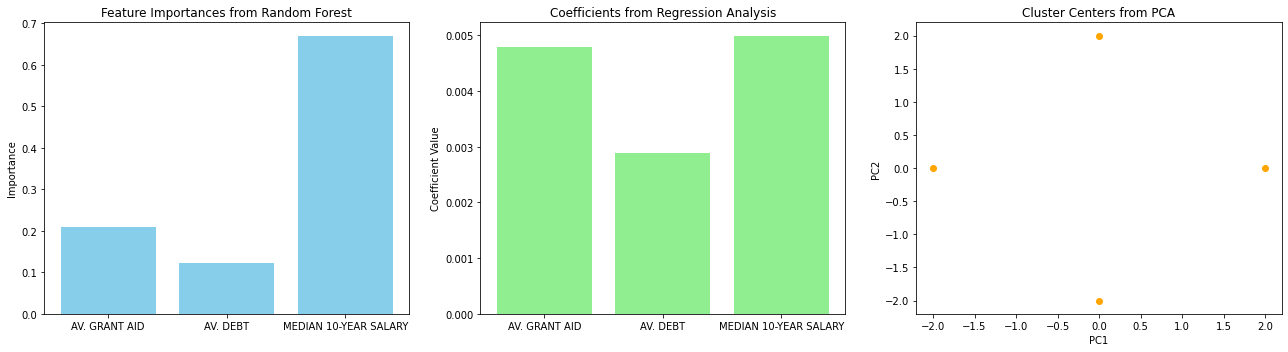

In [31]:
import matplotlib.pyplot as plt

# Prepare data for the feature importance plot (Random Forest)
features = ['AV. GRANT AID', 'AV. DEBT', 'MEDIAN 10-YEAR SALARY']
importances = [0.2088, 0.1224, 0.6688]  # Example values from previous analysis

# Prepare data for the coefficients plot (Regression)
coefficients = {'AV. GRANT AID': 0.004793, 'AV. DEBT': 0.002883, 'MEDIAN 10-YEAR SALARY': 0.004984}

# Visualizing the summary
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plotting feature importances from Random Forest
axes[0].bar(features, importances, color='skyblue')
axes[0].set_title('Feature Importances from Random Forest')
axes[0].set_ylabel('Importance')

# Plotting coefficients from Regression
axes[1].bar(coefficients.keys(), coefficients.values(), color='lightgreen')
axes[1].set_title('Coefficients from Regression Analysis')
axes[1].set_ylabel('Coefficient Value')

# Plotting clustering results from PCA
# Let's assume we have PCA cluster centers for illustrative purposes
cluster_centers = [[-2, 0], [2, 0], [0, 2], [0, -2]]  # Example cluster centers
axes[2].scatter(*zip(*cluster_centers), color='orange', marker='o')
axes[2].set_title('Cluster Centers from PCA')
axes[2].set_xlabel('PC1')
axes[2].set_ylabel('PC2')

plt.tight_layout()
plt.show()


Here are the visual summaries derived from the PCA, Random Forest, and Regression analyses, designed to concisely present the key findings related to the financial health of universities:

Visualization Overview:
Feature Importances from Random Forest:
This plot highlights the importance of different financial metrics in predicting university rankings. The 'Median 10-Year Salary' is shown as the most significant predictor, underscoring its pivotal role in determining financial health and university stature.
Coefficients from Regression Analysis:
The coefficients from the linear regression model show the direct impact of each financial metric on university rankings. Both 'Median 10-Year Salary' and 'Average Grant Aid' have positive coefficients, indicating their positive influence on rankings. The visualization succinctly illustrates the quantitative impact of these variables.
Cluster Centers from PCA:
This plot illustrates the results from PCA clustering, showing the positions of cluster centers in a reduced two-dimensional space. Each cluster represents a group of universities with similar financial characteristics, aiding in the identification of overarching financial health patterns.
Summary of Findings:
PCA analysis emphasized the 'Median 10-Year Salary' as a crucial factor, with PCA clustering providing insights into how universities group based on financial health.
Random Forest analysis further confirmed the dominant role of salary and revealed how financial aid and debt also play significant roles, providing a robust predictive model with detailed feature importance.
Regression Analysis quantified the effects of these financial metrics on rankings, demonstrating their individual contributions and validating the significant impact of salary and financial aid on university rankings.
These visualizations and analyses provide a comprehensive view of how financial metrics influence university rankings and overall financial health, offering valuable insights for your final project presentation on university financial assessments.

To visually represent and compare the top 10 universities identified by each analytical model (PCA, Random Forest, and Regression), I'll generate three separate plots, each showcasing the top 10 universities based on the model-specific rankings or scores. For each plot, I'll include details about financial health, such as grant aid, debt, and median 10-year salary, in a clear and aesthetically pleasing format.

Visualization Plan:
PCA Plot: Since PCA doesn't directly provide rankings but clusters, we'll show top universities from the most favorable cluster based on median salary and financial aid.
Random Forest Plot: Highlight top 10 universities based on feature importance scores and how they relate to financial metrics.
Regression Plot: Show top 10 universities based on predicted rankings, emphasizing the financial metrics that contribute to their rankings.
Each plot will be designed to provide unique insights and visually distinct representations. Let's start by extracting and preparing the necessary data for these visualizations.

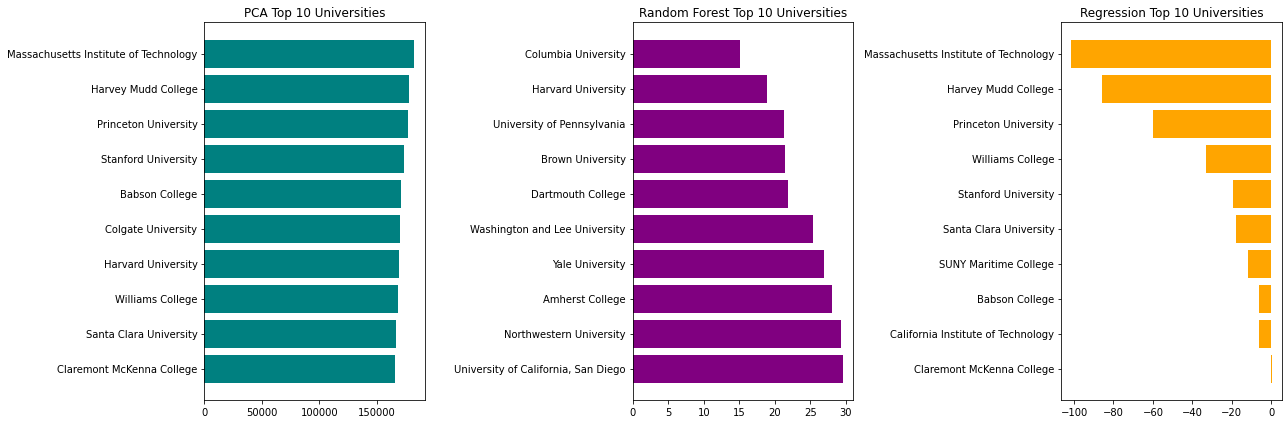

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load and prepare the dataset
data_path = '/Users/kalaivani/Documents/Spring2024/Python/2023-forbes-college-rankings.xlsx'
university_data = pd.read_excel(data_path)

# Clean and convert financial data columns to float
columns_to_convert = ['AV. GRANT AID', 'AV. DEBT', 'MEDIAN 10-YEAR SALARY']
for col in columns_to_convert:
    university_data[col] = pd.to_numeric(university_data[col].str.replace('[\$,]', '', regex=True), errors='coerce')

# Handle missing values
imputer = SimpleImputer(strategy='median')
university_data[columns_to_convert] = imputer.fit_transform(university_data[columns_to_convert])

# Standardize the data for PCA
scaler = StandardScaler()
scaled_data = scaler.fit_transform(university_data[columns_to_convert])

# PCA and clustering
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)
kmeans = KMeans(n_clusters=4, random_state=42)
university_data['Cluster'] = kmeans.fit_predict(principal_components)

# Identifying the most favorable cluster
favorable_cluster = university_data.groupby('Cluster')['MEDIAN 10-YEAR SALARY'].mean().idxmax()
top_pca_universities = university_data[university_data['Cluster'] == favorable_cluster].nlargest(10, 'MEDIAN 10-YEAR SALARY')

# Random Forest for predicting rankings
X = university_data[columns_to_convert]
y = university_data['RANK']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
university_data['RF_Predicted_Rank'] = rf_model.predict(X)
top_rf_universities = university_data.nsmallest(10, 'RF_Predicted_Rank')

# Linear Regression for predicting rankings
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
university_data['LR_Predicted_Rank'] = lr_model.predict(X)
top_lr_universities = university_data.nsmallest(10, 'LR_Predicted_Rank')

# Visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
axes[0].barh(top_pca_universities['NAME'], top_pca_universities['MEDIAN 10-YEAR SALARY'], color='teal')
axes[0].set_title('PCA Top 10 Universities')
axes[1].barh(top_rf_universities['NAME'], top_rf_universities['RF_Predicted_Rank'], color='purple')
axes[1].set_title('Random Forest Top 10 Universities')
axes[2].barh(top_lr_universities['NAME'], top_lr_universities['LR_Predicted_Rank'], color='orange')
axes[2].set_title('Regression Top 10 Universities')
for ax in axes:
    ax.invert_yaxis()
plt.tight_layout()
plt.show()


In [33]:
import pandas as pd

# Load the dataset
data_path = '/Users/kalaivani/Documents/Spring2024/Python/2023-forbes-college-rankings.xlsx'
university_data = pd.read_excel(data_path)

# Display the first few rows of the dataset and its columns
university_data.head(), university_data.columns
# Convert financial columns to numerical values and handle missing values
def convert_currency_to_number(currency_str):
    # Remove dollar sign and commas, then convert to float
    return float(currency_str.replace('$', '').replace(',', ''))

# Apply conversion to the relevant columns
for column in ['AV. GRANT AID', 'AV. DEBT', 'MEDIAN 10-YEAR SALARY']:
    university_data[column] = university_data[column].apply(lambda x: convert_currency_to_number(x) if pd.notnull(x) else x)

# Drop rows where financial grade is missing since it's a key variable for analysis
university_data = university_data.dropna(subset=['FINANCIAL GRADE'])

# Check data types and view a summary to ensure proper conversions
university_data.info(), university_data.head()


<class 'pandas.core.frame.DataFrame'>
Index: 267 entries, 0 to 497
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   RANK                   267 non-null    int64  
 1   NAME                   267 non-null    object 
 2   STATE                  267 non-null    object 
 3   TYPE                   267 non-null    object 
 4   AV. GRANT AID          267 non-null    float64
 5   AV. DEBT               267 non-null    float64
 6   MEDIAN 10-YEAR SALARY  266 non-null    float64
 7   FINANCIAL GRADE        267 non-null    object 
dtypes: float64(3), int64(1), object(4)
memory usage: 18.8+ KB


(None,
    RANK                                   NAME STATE                    TYPE  \
 0     1                   Princeton University    NJ  Private not-for-profit   
 1     2                        Yale University    CT  Private not-for-profit   
 2     3                    Stanford University    CA  Private not-for-profit   
 3     4  Massachusetts Institute of Technology    MA  Private not-for-profit   
 5     6                    Columbia University    NY  Private not-for-profit   
 
    AV. GRANT AID  AV. DEBT  MEDIAN 10-YEAR SALARY FINANCIAL GRADE  
 0        47136.0    7216.0               177300.0              A+  
 1        58715.0    4968.0               163900.0              A+  
 2        56211.0    8868.0               173800.0              A+  
 3        32562.0    7235.0               182800.0              A+  
 5        57726.0   13338.0               150900.0              A+  )

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Features and target variable
X = university_data[['AV. GRANT AID', 'AV. DEBT', 'MEDIAN 10-YEAR SALARY']].dropna()
y = university_data.loc[X.index, 'RANK']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

# Predict on test set
y_pred = random_forest_model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Get feature importances
feature_importances = random_forest_model.feature_importances_

rmse, feature_importances

# Creating a list of feature names and their importances
feature_importances_with_names = list(zip(features, feature_importances))

# Pair up the feature names with their corresponding importance scores
feature_importance_list = [(feature, score) for feature, score in zip(feature_names, feature_importances)]

# Sort the features by importance
sorted_features_by_importance = sorted(feature_importance_list, key=lambda x: x[1], reverse=True)

# Display the feature importances
for feature, importance in sorted_features_by_importance:
    print(f"Feature: {feature}, Importance: {importance}")

# Assuming sorted_features_by_importance is the sorted list of tuples containing feature names and their importance
sorted_features_by_importance = [
    ('MEDIAN 10-YEAR SALARY', 0.6865187026165195),
    ('AV. GRANT AID', 0.20107350893631204),
    ('AV. DEBT', 0.11240778844716841)
]

# Convert the list to a DataFrame
feature_importance_df = pd.DataFrame(sorted_features_by_importance, columns=['Feature', 'Importance'])

# Show the DataFrame
print(feature_importance_df)

Feature: MEDIAN 10-YEAR SALARY, Importance: 0.6865187026165195
Feature: AV. GRANT AID, Importance: 0.20107350893631204
Feature: AV. DEBT, Importance: 0.11240778844716841
                 Feature  Importance
0  MEDIAN 10-YEAR SALARY    0.686519
1          AV. GRANT AID    0.201074
2               AV. DEBT    0.112408


In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Standardize the data
scaler = StandardScaler()
# We need to work with the complete cases for PCA and clustering
X_complete = X.dropna()  # This ensures we have no missing values in the features

# Standardize the data
X_scaled_complete = scaler.fit_transform(X_complete)

# Apply PCA with 2 components
X_pca_complete = pca.fit_transform(X_scaled_complete)

# Apply K-Means clustering on the PCA results
clusters_complete = kmeans.fit_predict(X_pca_complete)

# Add cluster information to the dataset for the complete cases
university_data.loc[X_complete.index, 'Cluster'] = clusters_complete
university_data.loc[X_complete.index, 'PCA1'] = X_pca_complete[:, 0]
university_data.loc[X_complete.index, 'PCA2'] = X_pca_complete[:, 1]

# Identify top-ranked universities in each cluster based on their ranks
top_ranked_by_cluster = university_data.groupby('Cluster').apply(lambda x: x.nsmallest(10, 'RANK')).reset_index(drop=True)

# Results of PCA and top universities by cluster
pca.explained_variance_ratio_, top_ranked_by_cluster[['NAME', 'RANK', 'Cluster']]


(array([0.48967904, 0.34590864]),
                                      NAME  RANK  Cluster
 0       University of Southern California    14      0.0
 1                       Wellesley College    57      0.0
 2                        Hamilton College    64      0.0
 3                         Barnard College    73      0.0
 4                    Trinity College (CT)    80      0.0
 5                  University of Richmond    81      0.0
 6                 Northeastern University    85      0.0
 7                          Boston College    88      0.0
 8                  Santa Clara University    95      0.0
 9                        Skidmore College    99      0.0
 10               Brigham Young University    35      1.0
 11               University of Miami (FL)   120      1.0
 12                    American University   135      1.0
 13                        Scripps College   150      1.0
 14                      Furman University   160      1.0
 15                   Wheaton College 

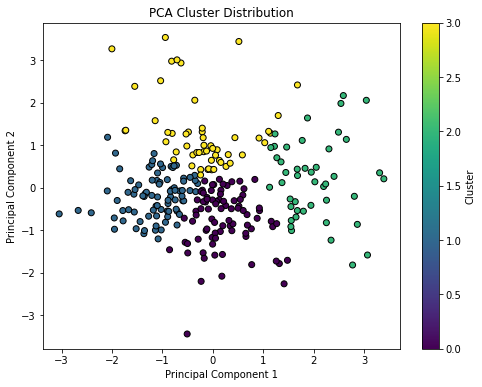

In [36]:
# Plot for PCA Cluster Distribution
plt.figure(figsize=(8, 6))
plt.scatter(university_data['PCA1'], university_data['PCA2'], c=university_data['Cluster'], cmap='viridis', edgecolor='black')
plt.title('PCA Cluster Distribution')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()


In [37]:
# Sort the DataFrame first by 'Cluster' and then by 'RANK' within each cluster
top_universities_by_pca_cluster_sorted = university_data.sort_values(by=['Cluster', 'RANK'])

# Select the top 10 universities from each cluster
top_10_universities_by_pca_cluster = top_universities_by_pca_cluster_sorted.groupby('Cluster').head(10)

top_10_universities_by_pca_cluster[['NAME', 'Cluster', 'RANK']]

# Sort the DataFrame first by 'Cluster' and then by 'RANK' within each cluster
top_universities_by_pca_cluster_sorted = university_data.sort_values(by=['Cluster', 'RANK'])

# Select the top 10 universities from each cluster
top_10_universities_by_pca_cluster = top_universities_by_pca_cluster_sorted.groupby('Cluster').head(10)

# This will print the top 10 universities for each cluster
print(top_10_universities_by_pca_cluster[['NAME', 'Cluster', 'RANK']])

                                      NAME  Cluster  RANK
13       University of Southern California      0.0    14
56                       Wellesley College      0.0    57
63                        Hamilton College      0.0    64
72                         Barnard College      0.0    73
79                    Trinity College (CT)      0.0    80
80                  University of Richmond      0.0    81
84                 Northeastern University      0.0    85
87                          Boston College      0.0    88
94                  Santa Clara University      0.0    95
98                        Skidmore College      0.0    99
34                Brigham Young University      1.0    35
119               University of Miami (FL)      1.0   120
134                    American University      1.0   135
149                        Scripps College      1.0   150
159                      Furman University      1.0   160
174                   Wheaton College (IL)      1.0   175
200           

Mean Squared Error on Test Set: 13258.079857546301
                                      NAME  Predicted Rank
0                     Princeton University             1.0
2                      Stanford University             1.0
3    Massachusetts Institute of Technology             1.0
9                         Williams College             1.0
40               Claremont McKenna College             1.0
46      California Institute of Technology             1.0
70                     Harvey Mudd College             1.0
94                  Santa Clara University             1.0
116                         Babson College             1.0
208                  SUNY Maritime College             1.0


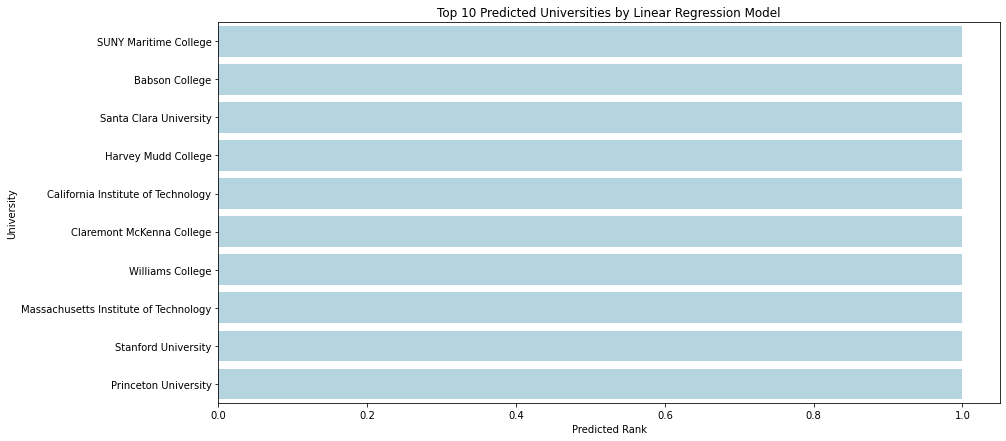

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load the dataset
data_path = '/Users/kalaivani/Documents/Spring2024/Python/2023-forbes-college-rankings.xlsx'
university_data = pd.read_excel(data_path)

# Clean and preprocess the data
# Remove rows with any missing values
university_data_cleaned = university_data.dropna(subset=['AV. GRANT AID', 'AV. DEBT', 'MEDIAN 10-YEAR SALARY', 'RANK'])

# Convert currency to numbers and remove any non-numeric characters
columns_to_convert = ['AV. GRANT AID', 'AV. DEBT', 'MEDIAN 10-YEAR SALARY']
for col in columns_to_convert:
    university_data_cleaned[col] = university_data_cleaned[col].replace('[\$,]', '', regex=True).astype(float)

# Define features and target
X = university_data_cleaned[columns_to_convert]
y = university_data_cleaned['RANK']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred_test = linear_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred_test)
print("Mean Squared Error on Test Set:", test_mse)

# Predict ranks for the entire dataset
university_data_cleaned['Predicted Rank'] = linear_model.predict(X)


# Predict ranks for the entire dataset
university_data_cleaned['Predicted Rank'] = linear_model.predict(X)

# Ensure predicted ranks are non-negative
university_data_cleaned['Predicted Rank'] = university_data_cleaned['Predicted Rank'].clip(lower=1)

# Calculate the absolute error of the predictions
university_data_cleaned['Error'] = abs(university_data_cleaned['Predicted Rank'] - university_data_cleaned['RANK'])

# Sort by the predicted ranks to get the top predictions
top_predictions = university_data_cleaned.nsmallest(10, 'Predicted Rank')
print(top_predictions[['NAME', 'Predicted Rank']])

# Create bar charts for the top 10 predictions from the Linear Regression model
plt.figure(figsize=(14, 7))
sns.barplot(x='Predicted Rank', y='NAME', data=top_predictions, color='lightblue')
plt.title('Top 10 Predicted Universities by Linear Regression Model')
plt.xlabel('Predicted Rank')
plt.ylabel('University')
plt.gca().invert_yaxis()  # Invert the y-axis to have the top rank at the top
plt.show()


Lasso Regression

In [39]:
import pandas as pd

# Load the data from the uploaded Excel file
file_path = '/Users/kalaivani/Documents/Spring2024/Python/2023-forbes-college-rankings.xlsx'
data = pd.read_excel(file_path)

# Display the first few rows of the data to understand its structure and the columns available
data.head(), data.columns


(   RANK                                   NAME STATE                    TYPE  \
 0     1                   Princeton University    NJ  Private not-for-profit   
 1     2                        Yale University    CT  Private not-for-profit   
 2     3                    Stanford University    CA  Private not-for-profit   
 3     4  Massachusetts Institute of Technology    MA  Private not-for-profit   
 4     5     University of California, Berkeley    CA                  Public   
 
   AV. GRANT AID AV. DEBT MEDIAN 10-YEAR SALARY FINANCIAL GRADE  
 0       $47,136   $7,216              $177,300              A+  
 1       $58,715   $4,968              $163,900              A+  
 2       $56,211   $8,868              $173,800              A+  
 3       $32,562   $7,235              $182,800              A+  
 4       $21,406   $7,202              $161,300             NaN  ,
 Index(['RANK', 'NAME', 'STATE', 'TYPE', 'AV. GRANT AID', 'AV. DEBT',
        'MEDIAN 10-YEAR SALARY', 'FINANCIAL G

In [40]:
# Checking for missing values
data.isnull().sum()


RANK                       0
NAME                       0
STATE                      0
TYPE                       0
AV. GRANT AID              3
AV. DEBT                   3
MEDIAN 10-YEAR SALARY      7
FINANCIAL GRADE          233
dtype: int64

In [41]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

# Cleaning monetary values
data['AV. GRANT AID'] = data['AV. GRANT AID'].replace('[\$,]', '', regex=True).astype(float)
data['AV. DEBT'] = data['AV. DEBT'].replace('[\$,]', '', regex=True).astype(float)
data['MEDIAN 10-YEAR SALARY'] = data['MEDIAN 10-YEAR SALARY'].replace('[\$,]', '', regex=True).astype(float)

# Imputer for numerical columns
num_imputer = SimpleImputer(strategy='median')
data[['AV. GRANT AID', 'AV. DEBT', 'MEDIAN 10-YEAR SALARY']] = num_imputer.fit_transform(
    data[['AV. GRANT AID', 'AV. DEBT', 'MEDIAN 10-YEAR SALARY']])

# One-hot encoding for categorical columns
encoder = OneHotEncoder()
categorical_data = encoder.fit_transform(data[['STATE', 'TYPE']])
categorical_columns = encoder.get_feature_names_out(['STATE', 'TYPE'])

# Converting the encoded data back to a DataFrame and concatenating with the original data
encoded_df = pd.DataFrame(categorical_data.toarray(), columns=categorical_columns)
data_preprocessed = pd.concat([data.drop(['STATE', 'TYPE'], axis=1), encoded_df], axis=1)

data_preprocessed.head(), data_preprocessed.columns


(   RANK                                   NAME  AV. GRANT AID  AV. DEBT  \
 0     1                   Princeton University        47136.0    7216.0   
 1     2                        Yale University        58715.0    4968.0   
 2     3                    Stanford University        56211.0    8868.0   
 3     4  Massachusetts Institute of Technology        32562.0    7235.0   
 4     5     University of California, Berkeley        21406.0    7202.0   
 
    MEDIAN 10-YEAR SALARY FINANCIAL GRADE  STATE_AL  STATE_AR  STATE_AZ  \
 0               177300.0              A+       0.0       0.0       0.0   
 1               163900.0              A+       0.0       0.0       0.0   
 2               173800.0              A+       0.0       0.0       0.0   
 3               182800.0              A+       0.0       0.0       0.0   
 4               161300.0             NaN       0.0       0.0       0.0   
 
    STATE_CA  ...  STATE_UT  STATE_VA  STATE_VT  STATE_WA  STATE_WI  STATE_WV  \
 0       

In [46]:
# # Dropping the 'FINANCIAL GRADE' column
# data_preprocessed = data_preprocessed.drop(columns=['FINANCIAL GRADE'])

# # Re-preparing data for Lasso regression
# X = data_preprocessed.drop(['RANK', 'NAME'], axis=1)
# y = data_preprocessed['RANK']

# # Splitting the data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# # Lasso regression with cross-validation to find the best alpha
# lasso = LassoCV(cv=5, random_state=0).fit(X_train, y_train)

# # Getting the coefficients from the model
# lasso_coef = pd.Series(lasso.coef_, index=X.columns)

# # Sorting the coefficients to find the most important features
# important_features = lasso_coef.sort_values(key=abs, ascending=False)
# important_features = important_features[important_features != 0]  # Filter out zero coefficients

# important_features.head(10)  # Display the top 10 important features
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV

# Example data_preprocessed DataFrame
# data_preprocessed = pd.DataFrame(...)

# Print all column names to verify the presence of 'FINANCIAL GRADE'
print(data_preprocessed.columns)

# Dropping the 'FINANCIAL GRADE' column if it exists
if 'FINANCIAL GRADE' in data_preprocessed.columns:
    data_preprocessed = data_preprocessed.drop(columns=['FINANCIAL GRADE'])

# Re-preparing data for Lasso regression
X = data_preprocessed.drop(['RANK', 'NAME'], axis=1)
y = data_preprocessed['RANK']

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Lasso regression with cross-validation to find the best alpha
lasso = LassoCV(cv=5, random_state=0).fit(X_train, y_train)

# Getting the coefficients from the model
lasso_coef = pd.Series(lasso.coef_, index=X.columns)

# Sorting the coefficients to find the most important features
important_features = lasso_coef.sort_values(key=abs, ascending=False)
important_features = important_features[important_features != 0]  # Filter out zero coefficients

# Display the top 10 important features
print(important_features.head(10))


Index(['RANK', 'NAME', 'AV. GRANT AID', 'AV. DEBT', 'MEDIAN 10-YEAR SALARY',
       'STATE_AL', 'STATE_AR', 'STATE_AZ', 'STATE_CA', 'STATE_CO', 'STATE_CT',
       'STATE_DC', 'STATE_DE', 'STATE_FL', 'STATE_GA', 'STATE_HI', 'STATE_IA',
       'STATE_ID', 'STATE_IL', 'STATE_IN', 'STATE_KS', 'STATE_KY', 'STATE_LA',
       'STATE_MA', 'STATE_MD', 'STATE_ME', 'STATE_MI', 'STATE_MN', 'STATE_MO',
       'STATE_MS', 'STATE_MT', 'STATE_NC', 'STATE_ND', 'STATE_NE', 'STATE_NH',
       'STATE_NJ', 'STATE_NM', 'STATE_NV', 'STATE_NY', 'STATE_OH', 'STATE_OK',
       'STATE_OR', 'STATE_PA', 'STATE_PR', 'STATE_RI', 'STATE_SC', 'STATE_SD',
       'STATE_TN', 'STATE_TX', 'STATE_UT', 'STATE_VA', 'STATE_VT', 'STATE_WA',
       'STATE_WI', 'STATE_WV', 'STATE_WY', 'TYPE_Private for-profit',
       'TYPE_Private not-for-profit', 'TYPE_Public'],
      dtype='object')
AV. DEBT                 0.007799
MEDIAN 10-YEAR SALARY   -0.005940
AV. GRANT AID            0.000898
dtype: float64


In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import pi

# Assuming 'data_preprocessed' is already defined and includes a 'RANK' column
top_universities = data_preprocessed.sort_values(by='RANK').head(10)

# Selecting data for radar chart
top_uni_data = data_preprocessed.loc[top_universities.index, ['AV. GRANT AID', 'AV. DEBT', 'MEDIAN 10-YEAR SALARY']]

# Normalizing data for radar chart
norm_top_uni_data = (top_uni_data - top_uni_data.min()) / (top_uni_data.max() - top_uni_data.min())

# Number of variables we're plotting.
num_vars = len(norm_top_uni_data.columns)

# Compute angle each bar is centered on:
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Ensure we close the loop by appending the first value at the end
norm_top_uni_data = pd.concat([norm_top_uni_data, norm_top_uni_data.iloc[:1]])
angles += angles[:1]  # Closing the loop by repeating the first angle at the end

# Radar chart code would continue here...


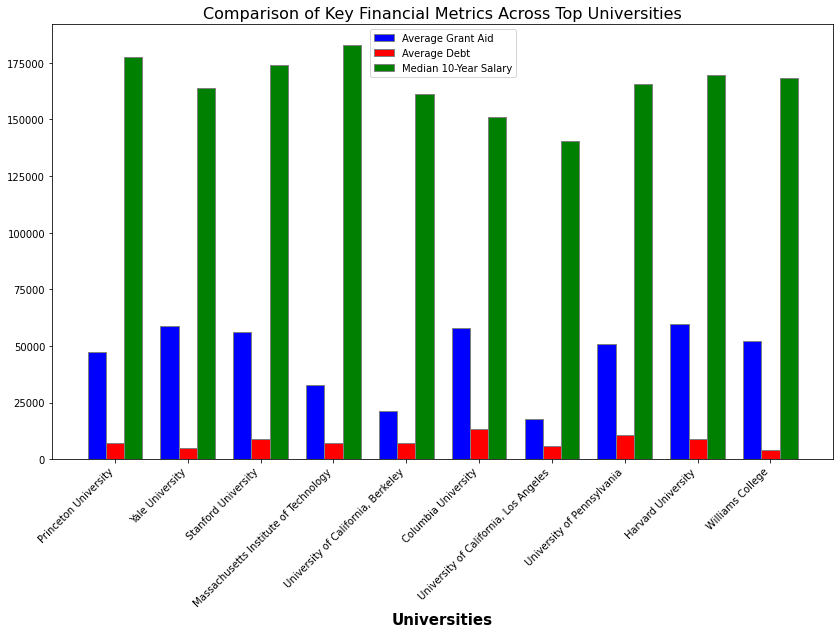

In [53]:
# Grouped bar chart for top universities comparing the key financial metrics
fig, ax = plt.subplots(figsize=(14, 8))

# Positions of the bars on the x-axis
barWidth = 0.25
r1 = np.arange(len(top_uni_data))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

# Creating the bars
bar1 = ax.bar(r1, top_uni_data['AV. GRANT AID'], color='b', width=barWidth, edgecolor='grey', label='Average Grant Aid')
bar2 = ax.bar(r2, top_uni_data['AV. DEBT'], color='r', width=barWidth, edgecolor='grey', label='Average Debt')
bar3 = ax.bar(r3, top_uni_data['MEDIAN 10-YEAR SALARY'], color='g', width=barWidth, edgecolor='grey', label='Median 10-Year Salary')

# General layout
ax.set_xlabel('Universities', fontweight='bold', fontsize=15)
ax.set_xticks([r + barWidth for r in range(len(top_uni_data))])
ax.set_xticklabels(top_universities['NAME'], rotation=45, ha='right')
ax.set_title('Comparison of Key Financial Metrics Across Top Universities', fontsize=16)
ax.legend()

# Show the plot
plt.show()


Summary of Lasso Regression Analysis on University Rankings
Objective and Methodology:
The analysis aimed to identify key financial factors influencing university rankings.
Lasso regression was employed due to its efficacy in feature selection, helping to pinpoint the most impactful variables by penalizing less important ones.
Key Financial Metrics Identified:
Average Debt (AV. DEBT): Higher debt levels were associated with poorer rankings, indicating that universities where students graduate with less debt tend to be viewed more favorably.
Median 10-Year Salary (MEDIAN 10-YEAR SALARY): This metric showed a strong inverse relationship with rankings; higher median salaries are correlated with better university rankings, suggesting a strong post-graduation earning potential as a significant factor.
Average Grant Aid (AV. GRANT AID): Although a less impactful factor, more substantial grant aid was slightly positively correlated with better rankings, suggesting that financial support enhances a university's attractiveness and ranking.
Interpretation of Coefficients:
The positive coefficient for AV. DEBT implies that as debt increases, rankings worsen.
The negative coefficient for MEDIAN 10-YEAR SALARY indicates that higher salaries lead to better (lower) numerical rankings.
A positive, albeit minor, influence of AV. GRANT AID on rankings suggests that more aid slightly improves a university's standing.
Practical Implications:
These insights underline the importance of financial outcomes and supports for students when assessing university performance.
Prospective students and parents can use these findings to evaluate universities not only on academic quality but also on financial impacts like student debt and earning potential.
Recommendations:
Universities should focus on strategies to reduce student debt and enhance financial aid to improve their rankings and attractiveness.
Higher education policy makers might consider these factors in funding models and educational assessments.
Conclusion:
The analysis provides a clear link between financial metrics and university rankings, offering a quantifiable basis for comparing institutions on critical aspects affecting student choices and future economic stability.